#Importing Library and Preparing the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#Exploratory Data Analysis

In [ ]:
#Column in Dataset
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#Show data types and null value each column
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Menampilkan 10 baris pertama
diabetes_df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [ ]:
#Checking if there is null value
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Checking if there is zero value

#replace 0 value with NaN
diabetes_df_copy = diabetes_df.copy(deep = True) #deep = True -> Buat salinan indeks dan data dalam dataframe
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


#Berdasarkan Jurnal A model for early prediction of diabetes
oleh Talha Mahboob Alam et al, yang bersumber dari : https://reader.elsevier.com/reader/sd/pii/S2352914819300176?token=7D4F21A1900E1B47FA971E110A1469CE2A8882E14CFBF3A4C3790507841542704D1370C180ADD4341ED02B627B619B3F&originRegion=eu-west-1&originCreation=20220928035824

"Data cleaning consists of filling the missing values and removing
noisy data. Noisy data contains outliers which are removed to resolve
inconsistencies . In our dataset, glucose, blood Pressure, skin
thickness, insulin, and BMI have some zero values. **Thus, all the zero
values were replaced with the median value of that attribute.**"


Jadi di tahap ini yang saya lakukan adalah mengisi value 0 (missing values) pada beberapa kolom tersebut dengan nilai median untuk mengatasi nilai inconsistent

In [ ]:
#Fill null value with median
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].median(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].median(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)
#inplace = True -> untuk menyimpan hasil modifikasi pada dataframe diabetes_df_copy

#Berdasarkan Jurnal Deteksi Dini Penyakit Diabetes Menggunakan Machine Learning dengan Algoritma Logistic Regression

yang dikutip dari : https://jurnal.ugm.ac.id/v3/JNTETI/article/view/3586/1646 

"Pada  tahap  ini  juga  dilakukan pengecekan  terhadap  data  yang  tidak  seimbang.  Penanganan terhadap  data  yang  tidak  seimbang  dilakukan  menggunakan synthetic minority over-sampling technique(SMOTE)"

Pada tahap ini yang akan saya lakukan adala oversampling minority value, yakni value 1 pada variabel outcome yang berfungsi untuk menyeimbangkan data yang nantinya akan digunakan untuk prediksi

#Berdasarkan Jurnal SMOTE: Synthetic Minority Over-sampling Technique
yang dikutip dari : https://www.jair.org/index.php/jair/article/view/10302/24590

"However, the nature of the application requires a fairly high rate of correct detection in the minority class and allows for a small error rate in the majority class inorder to achieve this."

Alasan saya menggunakan teknik Oversampling adalah untuk meningkatkan sampel kelas minoritas dan untuk memperkecil tingkat kesalahan di kelas mayoritas




0    500
1    268
Name: Outcome, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


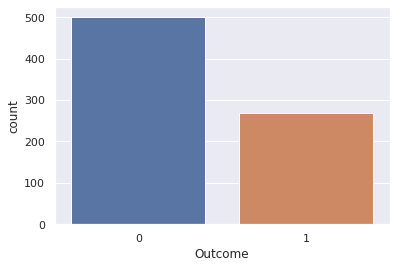

In [ ]:
#Counting 1 and 0 Value in Outcome column
sns.countplot(diabetes_df_copy['Outcome']) #membuat bar plot perbandingan jumlah value
print(diabetes_df_copy.Outcome.value_counts()) #menampilkan jumlah value 0 dan 1

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = diabetes_df_copy[(diabetes_df_copy['Outcome']==0)] # semua data yang value outcome nya = 0
df_minority = diabetes_df_copy[(diabetes_df_copy['Outcome']==1)] # semua data yang value outcome nya = 1
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 n_samples= 500, # to match majority class, menyamakan jumlah value 1 dengan 0
                                 random_state=0)  # reproducible results, random state 0 is better than 42
                                                  #Random state = Mengontrol pengacakan yang diterapkan ke data agar hasil yang didapatkan tetap sama
# Combine majority class with upsampled minority class
diabetes_df_copy2 = pd.concat([df_minority_upsampled, df_majority]) #menggabungkan Outcome 1 (minority) yang sudah di upsample dengan Outcome 0 (majority)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    500
0    500
Name: Outcome, dtype: int64


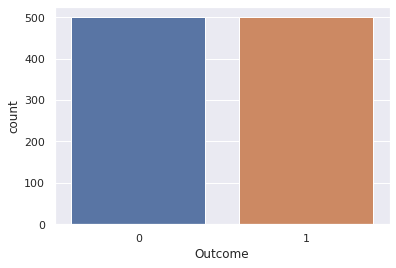

In [ ]:
#Counting 1 and 0 Value in Outcome column
sns.countplot(diabetes_df_copy2['Outcome'])
print(diabetes_df_copy2.Outcome.value_counts())

#Berdasarkan Jurnal Prediksi Risiko Penyakit Diabetes menggunakan Algoritma Regresi Logistik 
oleh Qatrunnada Refa Cahyani,Mochammad JanuarFinandi, Jathu Rianti, Devi Lestari Arianti, Arya Dwi Pratama Putra yang dapat diakses melalui https://journal.literasisains.id/index.php/jomlai/article/view/598/470 , kita melakukan tahap preprocessing yaitu pengecekan outliers pada variabel. Outliers  dihapus  dengan  menggunakan  Z-Score. Beberapa data dihapus karena nilainya jauh dari Z-Score. Maka jumlah data yang awalnya 1000 menjadi 941

#Berdasarkan Detection of Spatial Outlier by Using Improved Z-Score Test
yang dapat diakses melalui : https://booksc.org/book/77788899/9f8c40 , "The zscore test has long been used to detect outliers in data." 

Fungsi Tes Z-Score adalah untuk mendeteksi apakah terdapat outlier dalam data.  

#Alasan Menggunakan Z-Scores 
##Berdasarkan Outlier Detection in Multivariate Time Series Data Using a Fusion of K-Medoid, Standardized Euclidean Distance and Z-Score
yang dapat diakses melalui : https://link.springer.com/chapter/10.1007/978-3-030-69143-1_21 

Z-score technique produced a better outlier detection result of 0.9978 F-measure as compared to inter-quartile of 0.8571 F-measure.

Alasan saya menggunakan Z Score adalah karena Teknik Z-score menghasilkan hasil deteksi outlier yang lebih baik

#Checking Outliers using Box Plot

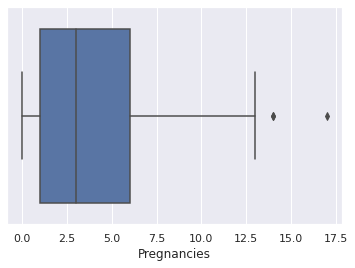

In [ ]:
sns.boxplot(x=diabetes_df_copy2["Pregnancies"])

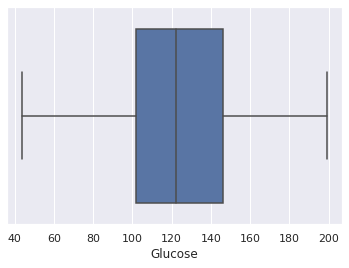

In [ ]:
sns.boxplot(x=diabetes_df_copy2["Glucose"])

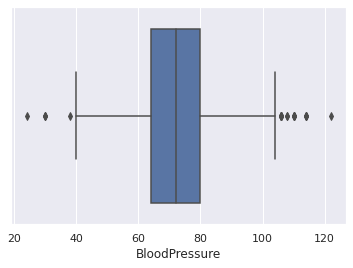

In [ ]:
sns.boxplot(x=diabetes_df_copy2["BloodPressure"])

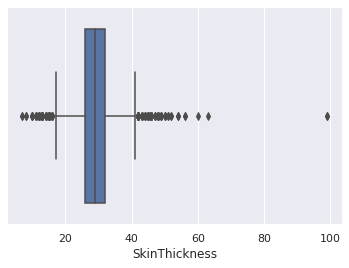

In [ ]:
sns.boxplot(x=diabetes_df_copy2["SkinThickness"])

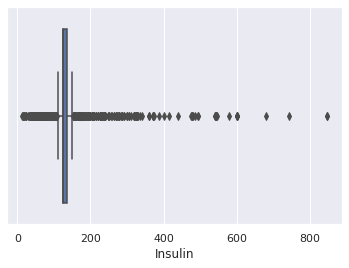

In [ ]:
sns.boxplot(x=diabetes_df_copy2["Insulin"])

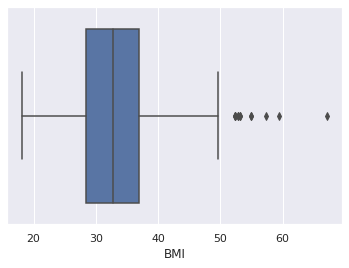

In [ ]:
sns.boxplot(x=diabetes_df_copy2["BMI"])

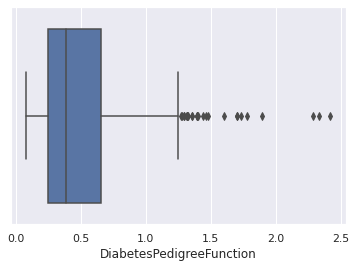

In [ ]:
sns.boxplot(x=diabetes_df_copy2["DiabetesPedigreeFunction"])

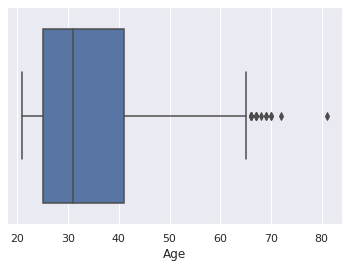

In [ ]:
sns.boxplot(x=diabetes_df_copy2["Age"])

#Check Outlier From Scratch using Z-Score

In [ ]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(diabetes_df_copy2["Pregnancies"])


Outliers: [17]


In [ ]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(diabetes_df_copy2["BloodPressure"])

Outliers: [110.0, 114.0, 110.0, 110.0, 114.0, 114.0, 30.0, 110.0, 114.0, 30.0, 30.0, 122.0, 110.0, 24.0]


In [ ]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(diabetes_df_copy2["SkinThickness"])

Outliers: [99.0, 56.0, 56.0, 99.0, 63.0, 60.0]


In [ ]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(diabetes_df_copy2["Insulin"])

Outliers: [478.0, 600.0, 495.0, 540.0, 600.0, 543.0, 600.0, 543.0, 846.0, 495.0, 600.0, 540.0, 846.0, 543.0, 474.0, 579.0, 478.0, 485.0, 744.0, 680.0, 545.0, 415.0, 480.0, 440.0]


In [ ]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(diabetes_df_copy2["BMI"])

Outliers: [67.1, 53.2, 53.2, 55.0, 59.4, 55.0, 57.3]


In [ ]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(diabetes_df_copy2["Age"])

Outliers: [70, 70, 72, 81]


In [ ]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(diabetes_df_copy2["DiabetesPedigreeFunction"])

Outliers: [1.893, 2.288, 2.42, 1.781, 2.329, 1.476, 1.731, 1.6, 1.699, 1.698, 1.461]


#Removing Outliers using Z Scores

#Berdasarkan jurnal Performance analysis of machine learning based optimized feature selection approaches for breast cancer diagnosis

yang dikutip dari : https://link.springer.com/article/10.1007/s41870-021-00671-5 

"Data preprocessing is a useful step that helps to remove
noise, inconsistencies and redundancy to achieve high
quality data which improves the performance. During the
data pre-processing, all the missing values are filled by the
mean of the corresponding feature. Formatting of the given
dataset is ensured to be consistent. All the incorrect data
types of the features changed to their required datatype.
Data normalization is performed on the given dataset to
make its range consistent. We used z-score normalization
on all the features to restrict the range of values between 3
to - 3"

"Generally, some of machine learning algorithms does
not handle categorical data. Diagnosis feature in this
dataset contains two categories M(malignant) and B(benign) is replaced numeric with M by 1 and N by 0."

Menurut jurnal tersebut. ambang batas Z-Score yang dapat diterapkan adalah antara -3 dan 3 untuk 2 kategori diagnosis (True or False)

In [ ]:
import scipy.stats as stats
z = np.abs(stats.zscore(diabetes_df_copy2))
data_clean = diabetes_df_copy2[(z<3).all(axis = 1)] #print all of rows that have z<3 (z score below 3)
data_clean.shape

#z<3 = print semua data yang Z-Scorenya kurang dari 3
#.all(axis=1) =  melihat di bagian kolom untuk setiap baris (melihat kolom z score setelah di proses dengan print z kurang dari 3)
#np.abs = berfungsi untuk bilangan mutlak (mengubah z-score yang minus menjadi positif)

(941, 9)

In [ ]:
#Cleaned Outliers data using Z Scores
data_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
451,2,134.0,70.0,29.0,125.0,28.9,0.542,23,1
128,1,117.0,88.0,24.0,145.0,34.5,0.403,40,1
306,10,161.0,68.0,23.0,132.0,25.5,0.326,47,1
542,10,90.0,85.0,32.0,125.0,34.9,0.825,56,1
730,3,130.0,78.0,23.0,79.0,28.4,0.323,34,1
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,29.0,125.0,22.5,0.142,33,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0


In [ ]:
diabetes_df_copy2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
451,2,134.0,70.0,29.0,125.0,28.9,0.542,23,1
128,1,117.0,88.0,24.0,145.0,34.5,0.403,40,1
306,10,161.0,68.0,23.0,132.0,25.5,0.326,47,1
542,10,90.0,85.0,32.0,125.0,34.9,0.825,56,1
730,3,130.0,78.0,23.0,79.0,28.4,0.323,34,1
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,29.0,125.0,22.5,0.142,33,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0


#Print baris yang mengandung outlier

In [ ]:
#Print rows dalam dataframe diabetes_df_copy2 yang not isin(tidak didalam) dataframe data_clean
#lambang (~) menandakan NOT
diabetes_df_copy2[~diabetes_df_copy2.index.isin(data_clean.index)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
220,0,177.0,60.0,29.0,478.0,34.6,1.072,21,1
584,8,124.0,76.0,24.0,600.0,28.7,0.687,52,1
45,0,180.0,66.0,39.0,125.0,42.0,1.893,25,1
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
691,13,158.0,114.0,29.0,125.0,42.3,0.257,44,1
111,8,155.0,62.0,26.0,495.0,34.0,0.543,46,1
655,2,155.0,52.0,27.0,540.0,38.7,0.240,25,1
579,2,197.0,70.0,99.0,125.0,34.7,0.575,62,1
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


#Data Correlation
Berdasarkan Diabetes Prediction Based on XGBoost Algorithm oleh Mingqi Li et al 2020 bersumber dari https://iopscience.iop.org/article/10.1088/1757-899X/768/7/072093/pdf 

Setelah data preprocessing, kita harus mempelajari apakah data tersebut diproses dengan baik atau tidak dan bagaimana caranya
banyak korelasi antara data tersebut. Koefisien korelasi dapat digunakan untuk mencerminkan kedekatan
hubungan antar variabel. Koefisien korelasi dihitung dengan metode selisih.
Hal ini juga didasarkan pada dispersi kedua variabel dan rata-ratanya masing-masing. keduanya
perbedaan dikalikan untuk mencerminkan tingkat korelasi antara dua variabel

#Berdasarkan Jurnal Prediksi Risiko Penyakit Diabetes menggunakan Algoritma Regresi Logistik
 Jika  nilai  korelasi  >  0 maka terdapat  korelasi  positif.Sementara  nilai  satu  variabel  meningkat,  nilai  variabel  lainnya  juga meningkat. Jika persamaan korelasi = 0 maka tidak ada korelasi.  Jika korelasi < 0 maka ada korelasi  negatif. Sementara satu variabel meningkat, variabel lainnya menurun. Ketika korelasi diperiksa, ada 2 variabel yang bertindak sebagai korelasi positif terhadap  variabel  dependen outcome,variabel  tersebut  adalah glucose.  Seiring  peningkatan  ini,  variabel dependen  juga meningkat. Dengan demikian, semua variabel digunakan untuk modelling karena korelasinya berdekatan.

#Berdasarkan Complex heatmaps reveal patterns and correlations in multidimensional genomic data
Yang dapat dikutip dari : https://academic.oup.com/bioinformatics/article/32/18/2847/1743594 

 Heatmaps are a fundamental visualization method that is broadly used to unravel patterns hidden in genomic data. They are especially popular for gene expression analysis (Eisen et al., 1998) and methylation profiling (Sturm et al., 2012). With the increasing availability of genomic datasets, **visualization methods that effectively show relations within multidimensional data are urgently needed.** 

Alasan saya menggunakan heatmap adalah karena heatmap correlation dapat digunakan untuk menemukan hubungan potensial antara variabel dan untuk memahami kekuatan hubungan ini dan mendeteksi hubungan linier dan nonlinier

#Fungsi Heatmap Correlation Matrix
Berdasarkan Jurnal Implementasi Seleksi Fitur Klasifikasi Waktu
Kelulusan Mahasiswa Menggunakan Correlation
Matrix With Heatmap

Yang dikutip dari : https://ejurnal.ung.ac.id/index.php/jjeee/article/view/14403/4663# 

"atribut yang memiliki warna merah muda adalah atribut yang relavan dengan atribut aoutput dan sebaliknya atribut yang berwarna merah tua adalah atribut yang kurang relevan dengan atribut aoutput."

Atribut berwarna merah tua yang dimaksud oleh penulis adalah atribut yang memiliki korelasi negatif tinggi dengan kolom output

"dari 13 atribut awal yang digunakan terseleksi menjadi 9 atribut yang memiliki relevansi atau berkontribusi terhadap hasil output yaitu : jenis kelamin, kelas, umur, SKS1, IPS1, SKS2, SKS3, SKS4 dan SKS5, sedangkan atribut input yang kurang relevan terdapat 4 atribut yaitu : IPS2, IPS3, IPS4 dan IPS5"

#Alasan menggunakan Correlation Matrix Heatmap pada penelitian ini
Untuk melihat relevansi antar kolom. Disini target kolom saya adalah kolom "Output", dan relevansi antar kolomnya memiliki nilai positif. Maka saya akan menggunakan semua kolom sebagai indikator 

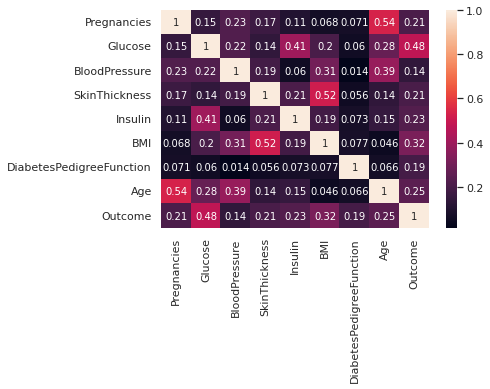

In [ ]:
sns.heatmap(data_clean.corr(), annot=True)

#.corr() = correlation matrix
#annot=True = memberikan value korelasi antar kolom dalam bentuk angka

#Machine Learning Model Building

axis=1 = Remove column

Dataset X = menggunakan semua kolom untuk kriteria dan ciri ciri pada tubuh pasien

Dataset y = sebagai hasil apakah pasien memiliki diabetes atau tidak

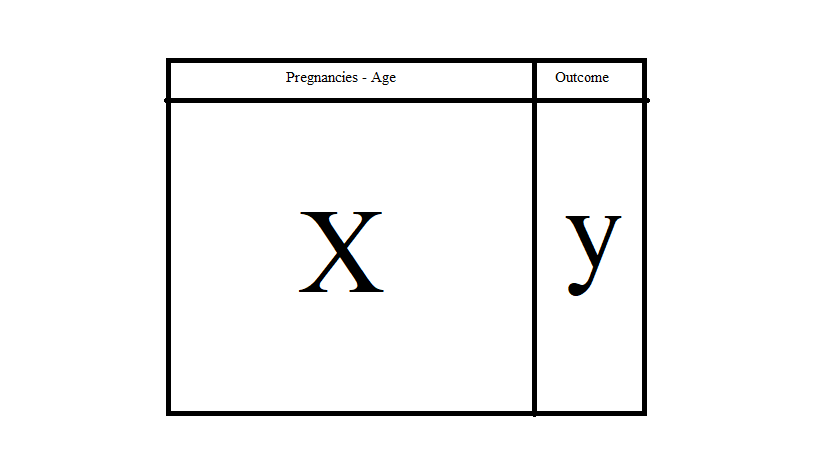

In [ ]:
X = data_clean.drop('Outcome', axis=1) #menggunakan semua atribut kecuali class (Outcome)
y = data_clean['Outcome'] #hanya menggunakan atribut class (Outcome)

#Metode 90 10

#Berdasarkan Jurnal Analysis and Prediction Of Pima Indian Diabetes Dataset Using SDKNN Classifier Technique

yang dikutip dari : https://iopscience.iop.org/article/10.1088/1757-899X/1070/1/012059/meta 

"Our concept is implemented on Pima Indian Diabetes Dataset (PIDD). The analysis on Pima Indian Diabetes Dataset (PIDD) is carried out by splitting dataset in to 90% training data and 10% testing data. We have found that, in our proposed technique, average classification accuracy gives result 83.2%, a great improvement as compared to other conventional technique."

Untuk tahap train test split, saya akan membagi data train menjadi 90% dan data test menjadi 10% karena dapat menghasilkan akurasi yang lebih baik

#Berdasarkan A Novel Diabetes Healthcare Disease Prediction Framework Using Machine Learning Techniques 
yang dikutip dari : https://downloads.hindawi.com/journals/jhe/2022/1684017.pdf


Foremost using
a function like the model selection train test split, the data set
is divided into the training and testing data sets. Due to the
limited data set source, about 90%, of the data set, is used for
training purposes and the remaining 10% is used for testing
by selecting the data randomly. 

Alasan saya membagi data train dan test menjadi 90% dan 10% adalah karena terbatasnya jumlah data untuk di training

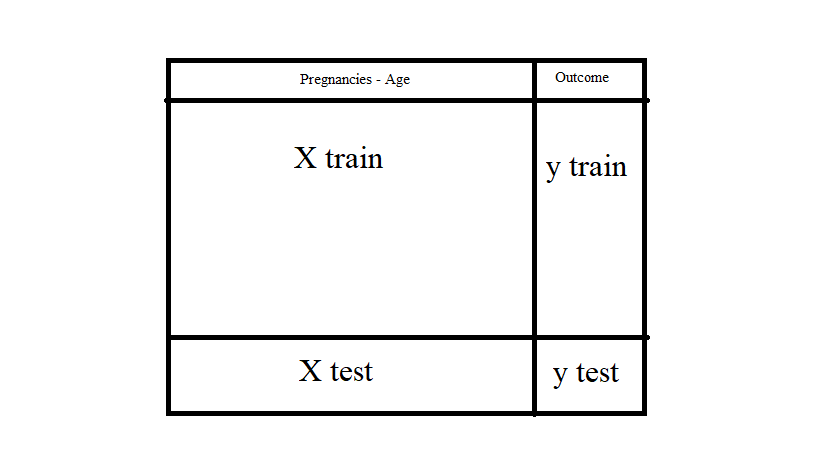

In [ ]:
#test size 10% and train size 90%
#Random state = Mengontrol pengacakan yang diterapkan ke data sebelum menerapkan pemisahan agar hasil yang didapatkan tetap sama
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0) #split test 10% dan train sisa dari test yaitu 90%

#Random state :

#Berdasarkan Jurnal A robust voting approach for diabetes prediction using traditional machine learning techniques

"5.3 Decision Tree

The optimum results obtained for this classifer tuning the
parameters of maximum features, minimum samples leaf,
minimum samples split and random state. Thus, the values
of these parameters are chosen as: ‘maximum features’:
‘log2’, ‘minimum samples leaf’: 12, ‘minimum samples split’:
5, ‘random state’: 0. The corresponding performance are
obtained as accuracy 77.92%, precision 77%, recall 78%,
F-1 score 77% and ROC score 72.56%."

Alasan saya menggunakan random state 0 adalah karena dalam penelitian tersebut menggunakan parameter random state = 0 untuk algoritma decision tree

#Berdasarkan Jurnal PERBANDINGAN AKURASI ALGORIMA DECISION TREE DAN ALGORITMA SUPPORT VECTOR MACHINE PADA PENYAKIT DIABETES

Pada penelitian kali ini, penulis menggunakan
hyperparameter random_state dan splitter. Hasil dari
Tuning Hyperparameter bisa dilihat pada Gambar 5.

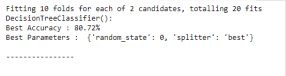

Gambar 5. Hasil Tuning Hyperparameter Decision
Tree


#Berdasarkan Jurnal Performance Accuration Method of Machine Learning for Diabetes Prediction

This research we  made  a  split test  with parameter constraints like  the  following train_test_split (X,  y,  test_size=  0.25,  random_state=42),where  we  made  a  test  data  of  0.25  from  testing  data  and supplying data with parameters 42.


#Berdasarkan Jurnal MACHINE LEARNING UNTUK PERBANDINGAN TINGKAT AKURASI PREDIKSI PENYAKIT DIABETES METODE SUPERVISED LEARNING

Algoritma Decision Tree yang kita gunakan untuk menetukan ambang batas parameter fitur algoritma Decision Tree Classifier adalah (yang pertama max_depth = dengen nilai 6, yang kedua max_features = dengan nilai 4, ketiga min_samples_split = dengan nilai 4, dan random_state = 42), menghasilkan akurasi pada dataset pelatihan ini: 0.852, akurasi pada dataset testing: 0.729

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0) #Mengontrol keacakan estimator agar hasil yang didapatkan selalu tetap
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix

#Berdasarkan Jurnal Machine learning models for non-invasive glucose measurement: towards diabetes management in smart healthcare
yang dikutip dari : https://link.springer.com/article/10.1007/s12553-022-00690-7

**Precision:** Precision is measurement of how many positive predictions are made for actual positive values.

**Recall/true positive rate/sensitivity:** Recall is measurement of correct positive predictions from all positive predictions made

**F-1 Score:** F-1 Measure is a combination of precision and recall

#Penjelasan
**Precision:** Tedapat 76% pasien yang **sebenarnya** terkena diabetes dibandingkan dengan keseluruhan pasien yang **diprediksi** terkena diabetes.

**Recall :** Terdapat 87% pasien yang **diprediksi** terkena diabetes dibandingkan dengan keseluruhan pasien yang **sebenarnya** terkena diabetes. 

**F-1 Score :** jika F1-Score punya skor yang baik mengindikasikan bahwa model klasifikasi punya precision dan recall yang baik




#Berdasarkan jurnal The advantages of the Matthews correlation coefficient (MCC) over F1 score and accuracy in binary classification evaluation

"Checking only F1, one would read a good value (0.66 in
the [0, 1] interval)."

nilai F1-Score bisa diilang bagus jika value F1 berada diantara 0,66 hingga 1

#Alasan menggunakan Precision Recall
yang dikutip dari : Jurnal The relationship between Recall and Precision
https://asistdl.onlinelibrary.wiley.com/doi/abs/10.1002/(SICI)1097-4571(199401)45:1%3C12::AID-ASI2%3E3.0.CO;2-L

"Recall and Precision and, in particular, Recall-Precision plots, have been used for many years to characterize document retrieval performance."

Alasan saya menggunakan Recall dan precision adalah untuk melihat kinerja model

#Berdasarkan Jurnal Diagnose Diabetic Mellitus Illness Based on IoT Smart Architecture
yang dikutip dari : https://www.hindawi.com/journals/wcmc/2022/7268571/ 

"for the classification considering the evaluative measures like
accuracy, precision, recall, and F1-score on PIDD and
claimed to have achieved comparatively enhanced results
on binary classifications"

Alasan kedua saya menggunakan precision recall adalah karena precision recall lebih cocok digunakan untuk binary classifications

#Berdasarkan buku Educating Engineers for Future Industrial Revolutions halaman 331

yang dikutip dari : https://www.google.co.id/books/edition/Educating_Engineers_for_Future_Industria/PQ8jEAAAQBAJ?hl=en&gbpv=1&dq=balanced+data+evaluation+metric&pg=PA331&printsec=frontcover

"For each algorithm we used an original and balanced data set to improve evaluation metrics as precision and recall."

Untuk Balanced dataset menggunakan precision dan recall berdasarkan buku tersebut

#Berdasarkan Jurnal Diagnosis of diabetes using machine learning algorithms

"Our model is based on the prediction precision of certain powerful machine learning (ML) algorithms based on different measures such as precision, recall, and F1-measure. The Pima Indian Diabetes (PIDD) dataset has been used, that can predict diabetic onset based on diagnostics manner"

Precision, Recall dan F-1 Score merupakan indikator ketepatan prediksi algoritma Machine Learning

In [ ]:
y_pred = dtree.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.8952380952380952
Precision Score :  0.8392857142857143
Recall Score :  0.9591836734693877


#Berdasarkan Jurnal Diabetes Mellitus Prediction using Classification Techniques
Yang dikutip dari : https://www.researchgate.net/profile/Anny-Leema/publication/344072667_Diabetes_Mellitus_Prediction_using_Classification_Techniques/links/5f50f16da6fdcc9879c511e9/Diabetes-Mellitus-Prediction-using-Classification-Techniques.pdf

"Confusion matrix is used to visualize the performance of the
algorithms which cross tabulates the observed and predicted
classes with associated statistics, evaluation metrics like
sensitivity, specificity, precision and accuracy are used to
evaluate the performance of the method. Factors like True
Positive (TP), True Negative (TN), False Positive (FP) and
False Negative (FN) are used"

Alasan saya menggunakan confusion matrix sebagai visualisasi data adalah untuk memvisualisasikan performa dari sebuah algoritma klasifikasi

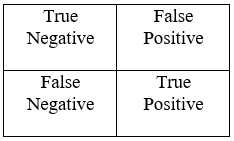


#Beberapa definisi dari bagian confusion matrix
True positive: 41 kasus di mana mesin memperkirakan jika pasien memiliki diabetes, dan mereka memang memiliki diabetes.

False-positive: 13 kasus dimana mesin memperkirakan jika pasien memiliki diabetes, padahal sebenarnya tidak memiliki diabetes

False-negative: 6 kasus dimana mesin memperkirakan jika pasien tidak memiliki diabetes, padahal sebenarnya memiliki diabetes

True Negative: 35 kasus di mana mesin memperkirakan jika pasien tidak memiliki diabetes, dan mereka memang memiliki diabetes.

Text(0.5, 1.0, 'Accuracy Score: 0.8842105263157894')

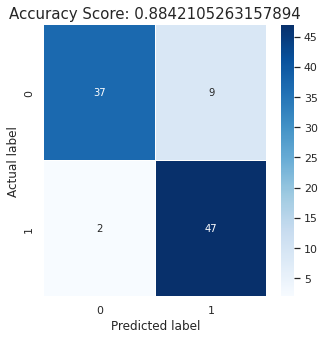

In [ ]:
cm = confusion_matrix(y_test, y_pred) #memasukkan y_test dan y_pred
plt.figure(figsize=(5,5)) #ukuran plotting heatmap
#settingan heatmap, 
#data=cm -> menggunakan variabel cm, 
#linewidths=.5 -> Lebar garis yang akan membagi setiap sel, 
#annot=True -> menampilkan value setiap sel,
#cmap = 'Blues' -> color space = Blue 
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues') 
plt.ylabel('Actual label') #Mendefinisikan sumbu y untuk Actual label
plt.xlabel('Predicted label') #Mendefinisikan sumbu x untuk predicted label
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test)) #melakukan kalkulasi score akurasi, {0} berfungsi untuk menampilkan angka akurasi
plt.title(all_sample_title, size = 15) #setting ukuran tulisan "Accuracy Score: 0.8"

#XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred = xgb_model.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.7959183673469388
Precision Score :  0.7959183673469388
Recall Score :  0.7959183673469388


Text(0.5, 1.0, 'Accuracy Score: 0.7894736842105263')

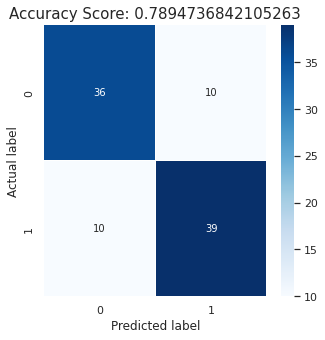

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test)) # menampilkan score akurasi 
plt.title(all_sample_title, size = 15) #format title untuk accuracy score

#Metode 80 20

#Berdasarkan Jurnal Improving the Classification Accuracy using Recursive Feature Elimination with Cross-Validation 
yang dikutip dari : http://www.puneetmisra.com/admin/uploads/journals/5f136d202b8ba1.18644117.pdf

"In
this study, we have used the train_test_split() method of
the Scikit-Learn library of python. Through this function, we divide the dataset into a different ratio. However, the 80/20 (train/test) rule is mostly used in the studies."

Tujuan penggunaan train test split menjadi 80 dan 20 adalah karena rasio tersebut paling sering digunakan dalam penelitian

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = dtree.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.8826815642458101
Precision Score :  0.8681318681318682
Recall Score :  0.8977272727272727


Text(0.5, 1.0, 'Accuracy Score: 0.8888888888888888')

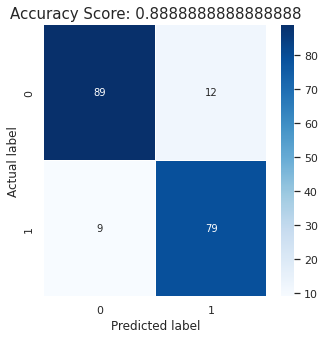

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

#XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred = xgb_model.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.8279569892473119
Precision Score :  0.7857142857142857
Recall Score :  0.875


Text(0.5, 1.0, 'Accuracy Score: 0.8306878306878307')

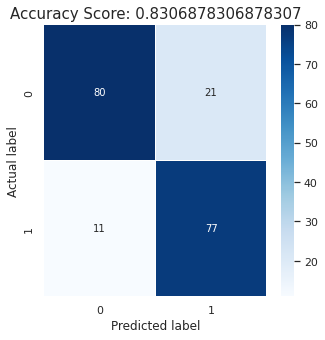

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

#Metode 70 30

#Berdasarkan Jurnal A Comparative Analysis for Diabetic Prediction Based on Machine Learning Techniques

Yang dikutip dari : https://www.iasj.net/iasj/download/a371daadb33b96fd
Disimpulkan bahwa Train Test split dengan rasio 70 dan 30 dapat menghasilkan akurasi yang lebih besar dibandingkan dengan metode K-Fold Cross Validation

In [ ]:
#test size 30% and train size 70%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = dtree.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.826388888888889
Precision Score :  0.815068493150685
Recall Score :  0.8380281690140845


Text(0.5, 1.0, 'Accuracy Score: 0.823321554770318')

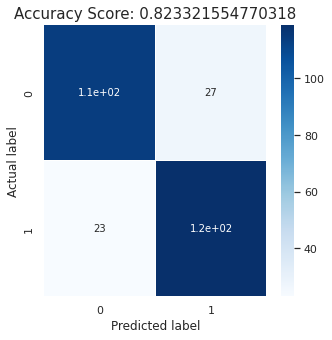

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

#XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred = xgb_model.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.8214285714285714
Precision Score :  0.8333333333333334
Recall Score :  0.8098591549295775


Text(0.5, 1.0, 'Accuracy Score: 0.823321554770318')

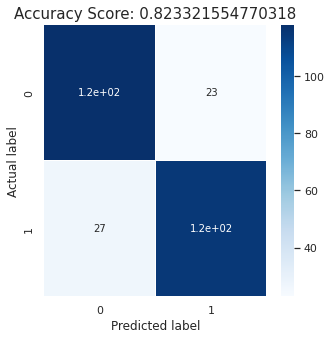

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

#Metode 60 40

In [ ]:
#test size 40% and train size 60%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = dtree.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.80306905370844
Precision Score :  0.785
Recall Score :  0.8219895287958116


Text(0.5, 1.0, 'Accuracy Score: 0.7957559681697612')

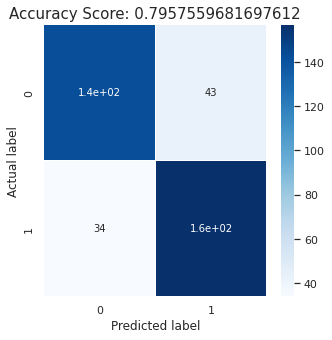

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

#XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred = xgb_model.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.7816711590296497
Precision Score :  0.8055555555555556
Recall Score :  0.7591623036649214


Text(0.5, 1.0, 'Accuracy Score: 0.7851458885941645')

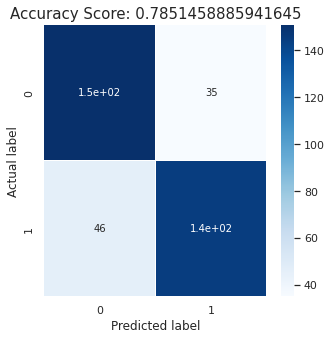

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

#Random State = 0, Balanced Dataset

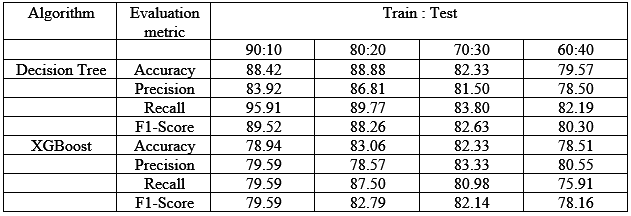

#Random State = 42, Balanced Dataset

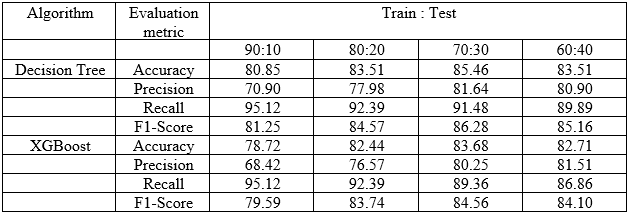

#Random State = 0, Imbalanced Dataset

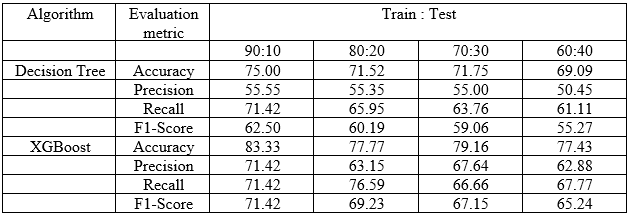

#Random State = 42, Imbalanced Dataset

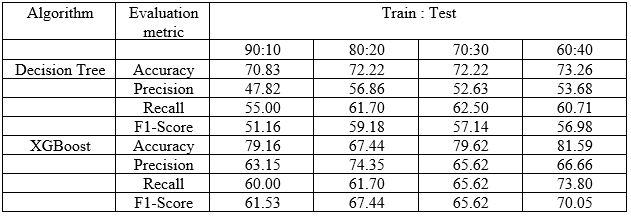

Hasil evaluation metric bisa dilihat disini : https://docs.google.com/document/d/1IZJ_LHIhJSF_-ZleAh3TzgvfvPMctrnW/edit?usp=sharing&ouid=110045745365014605980&rtpof=true&sd=true

#Revisi :
Oversampling minority ✔️

Heatmap correlation ✔️

Train test size 10% 90% ✔️

Precision Recall F-1 Score ✔️
